# Iris Classification Tutorial

Tutorial by the AI Guy walking through solving the Iris Dataset with Scikit Learn.

## 1. Import Required Dependencies

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#import scoring and report metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2. Load Iris Dataset

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

## 3. Summarize your Dataset

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# print type for the data and labels
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

In [7]:
# print labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 4. Peek your data

In [8]:
# perform EDA
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 4.1 Statistical Summary

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4.2 Class Distribution

In [10]:
print(df.groupby(iris.target).size())

0    50
1    50
2    50
dtype: int64


## 5. Data Visualization

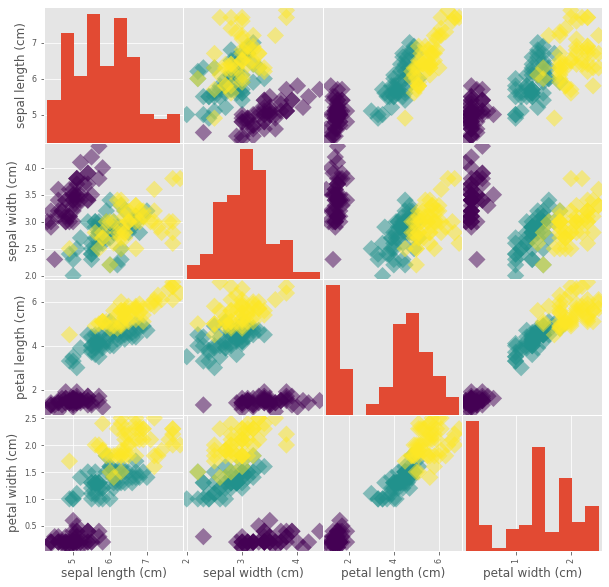

In [11]:
# visual EDA
graphs = pd.plotting.scatter_matrix(df, c = Y, figsize = [10,10], s = 150, marker = 'D')

## 6. Evaluate your Algorithms
In this section I will cover:
<ol>
    <li> Splitting the data. </li>
    <li> Setting up validation using 10-fold cross-validation method. </li>
    <li> Build 6 seperate models for predicting the Iris type. </li>
    <li> Determine best model for the data. </li>
</ol>

### 6.1 Split Dataset into Training and Test sets

In [12]:
test_set_size = 0.2
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_set_size, random_state = seed)

### 6.2 Validation
I will be using 10-fold cross-validation in order to determine effectiveness of training.
This will split the training dataset into 10 parts (folds) and use 9 for training and 1 for validation testing. This allows us to keep our test set pure and remain unbiased while using validation set to tune hyperparameters.

### 6.3 Building Models
We don't know exactly which type of model will be best at solving this dataset. From the data visualization above it appears that some variables may be linearly seperable. We will use both linear and non-linear models in this phase.

The algorithms used for this section are:
<ul>
    <li> Logistic Regression (LR) </li>
    <li> Linear Discriminant Analysis (LDA) </li>
    <li> K-Nearest Neighbour (KNN) </li>
    <li> Classification and Regression Trees (CART) </li>
    <li> Gaussian Naive Bayes (NB) </li>
    <li> Support Vector Machine (SVM) </li>
</ul>

In [16]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
results = []
names = []

#loop through models and train
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## 7. Make Predictions

### KNN

In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
predictions = knn.predict(x_test)
score_knn = accuracy_score(y_test, predictions)
print(score_knn)

0.9


In [20]:
# print confusion matrix and classification report
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix\n", conf_mat)
class_rep = classification_report(y_test, predictions)
print("Classification Report\n", class_rep)

Confusion Matrix
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### SVM

In [21]:
svm = SVC(gamma = 'auto')
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
predictions2 = svm.predict(x_test)
score_svm = accuracy_score(y_test, predictions2)
print(score_svm)

0.9333333333333333


In [25]:
# print confusion matrix and classification report
conf_mat2 = confusion_matrix(y_test, predictions2)
print("Confusion Matrix\n", conf_mat)
class_rep2 = classification_report(y_test, predictions2)
print("Classification Report\n", class_rep2)

Confusion Matrix
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Conclusion
Since our accuracy on SVM model (93.33%) was greater than that of our KNN model (90%) it can be deemed that the SVM model is best for our dataset.